In [1]:
# import necessary libraries
# virtual environment is tied to python 3.10.2
import math
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from matplotlib.ticker import MaxNLocator # to make integer ticks on x axis

In [2]:
# define target function as a fourier series approximation
def fourier_series(f, T, N, time_steps):
    t = sm.symbols('t')
    n = sm.symbols('n')
    omega = 2 * sm.pi / T
    tau = T / 2  # 50% duty cycle

    # Calculate Fourier coefficients analytically using SymPy
    a0 = (2 / T) * sm.integrate(f(t,tau), (t, 0, tau))
    an = (2 / T) * sm.integrate(f(t,tau) * sm.cos(n * omega * t), (t, 0, tau))
    bn = (2 / T) * sm.integrate(f(t,tau) * sm.sin(n * omega * t), (t, 0, tau))

    # Construct the Fourier series expression
    fourier_series = a0 / 2
    for i in range(1, N + 1):
        fourier_series += an.subs(n, i) * sm.cos(i * omega * t) + bn.subs(n, i) * sm.sin(i * omega * t)

    # Numerically evaluate the Fourier series for plotting
    fourier_series_values = np.array([fourier_series.subs(t, ti) for ti in time_steps], dtype=float)

    return fourier_series, fourier_series_values

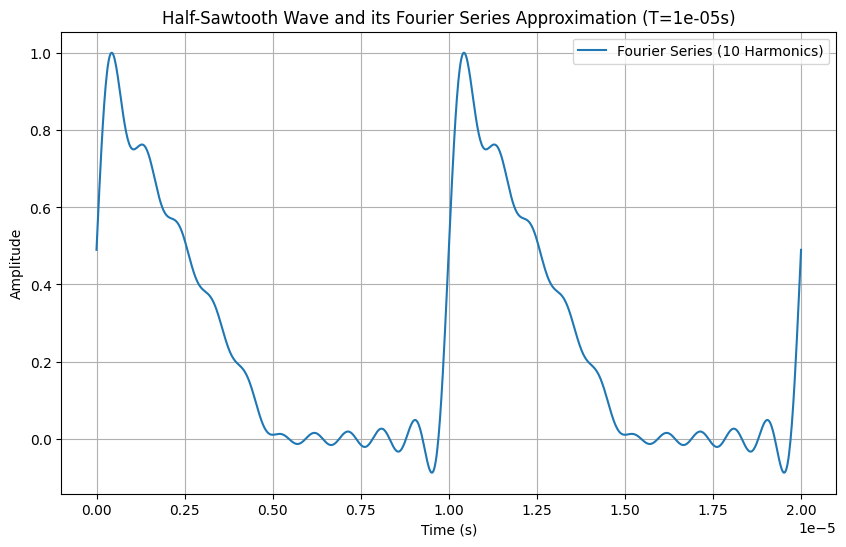

In [3]:
def plot_results(t_vals, fourier_series_values, n, T):
    """Plots Fourier series approximation of a function."""
    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, fourier_series_values, label=f'Fourier Series ({n} Harmonics)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Half-Sawtooth Wave and its Fourier Series Approximation (T={T}s)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
A = 1.0  # Amplitude (V)
T = 10e-6  # Period (s), 10 MHz frequency
N = 10  # Number of harmonics to calculate
num_points = 1000 # Number of points for plotting
sim_time = np.linspace(0, 2 * T, num_points)  # Time values for two periods

# Define the generic function f(t)
def func_def(t_sym, tau):
    return A * (1 - t_sym / tau)

# Calculate the Fourier series
unevaluated_fourier_series, fourier_series_values = fourier_series(func_def, T, N, sim_time)

# Plot the results
plot_results(sim_time, np.real(fourier_series_values), N, T)